In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("training_set1")
df.head()

,Unnamed: 0,Release,Total Gross,MoR,Budgets,Theaters,year,Potential,Color
0,0,How the Grinch Stole Christmas,260.044825,11,123.0,3256,2000,Blockbuster,green
1,1,Mission: Impossible II,215.409889,5,125.0,3669,2000,Blockbuster,green
2,2,Gladiator,187.705427,5,103.0,3188,2000,Blockbuster,green
3,3,The Perfect Storm,182.618434,6,120.0,3407,2000,Blockbuster,green
4,4,Meet the Parents,166.244045,10,55.0,2697,2000,Blockbuster,green


In [2]:
df = df[['year','Release','MoR','Theaters','Budgets','Potential','Color','Total Gross']]
df.head()

,year,Release,MoR,Theaters,Budgets,Potential,Color,Total Gross
0,2000,How the Grinch Stole Christmas,11,3256,123.0,Blockbuster,green,260.044825
1,2000,Mission: Impossible II,5,3669,125.0,Blockbuster,green,215.409889
2,2000,Gladiator,5,3188,103.0,Blockbuster,green,187.705427
3,2000,The Perfect Storm,6,3407,120.0,Blockbuster,green,182.618434
4,2000,Meet the Parents,10,2697,55.0,Blockbuster,green,166.244045


In [3]:
df['Budgets'] = df['Budgets'].astype(int)

In [4]:
df['B1'] = df['Budgets'].apply(lambda x: 1 if 0 <= x <= 50 else 0)
df['B2'] = df['Budgets'].apply(lambda x: 1 if 50 < x <= 100 else 0)
df['B3'] = df['Budgets'].apply(lambda x: 1 if 100 < x <= 150 else 0)
df['B4'] = df['Budgets'].apply(lambda x: 1 if 150 < x <= 200 else 0)
df['B5'] = df['Budgets'].apply(lambda x: 1 if 200 < x else 0)
df.head()


,year,Release,MoR,Theaters,Budgets,Potential,Color,Total Gross,B1,B2,B3,B4,B5
0,2000,How the Grinch Stole Christmas,11,3256,123,Blockbuster,green,260.044825,0,0,1,0,0
1,2000,Mission: Impossible II,5,3669,125,Blockbuster,green,215.409889,0,0,1,0,0
2,2000,Gladiator,5,3188,103,Blockbuster,green,187.705427,0,0,1,0,0
3,2000,The Perfect Storm,6,3407,120,Blockbuster,green,182.618434,0,0,1,0,0
4,2000,Meet the Parents,10,2697,55,Blockbuster,green,166.244045,0,1,0,0,0


In [5]:
df = df[['year','Release','MoR','Theaters','Budgets','B1','B2','B3','B4','B5','Potential','Color','Total Gross']]
df.head()

,year,Release,MoR,Theaters,Budgets,B1,B2,B3,B4,B5,Potential,Color,Total Gross
0,2000,How the Grinch Stole Christmas,11,3256,123,0,0,1,0,0,Blockbuster,green,260.044825
1,2000,Mission: Impossible II,5,3669,125,0,0,1,0,0,Blockbuster,green,215.409889
2,2000,Gladiator,5,3188,103,0,0,1,0,0,Blockbuster,green,187.705427
3,2000,The Perfect Storm,6,3407,120,0,0,1,0,0,Blockbuster,green,182.618434
4,2000,Meet the Parents,10,2697,55,0,1,0,0,0,Blockbuster,green,166.244045


In [6]:
#sb.scatterplot(x='Theaters', y='Total Gross', hue='B5', data=df, marker='o', label='b2')
# sb.scatterplot(x='Theaters', y='Total Gross', hue='B2', data=df, marker='s', label='b1')
# sb.scatterplot(x='Theaters', y='Total Gross', hue='B3', data=df, marker='^', label='b1')
# sb.scatterplot(x='Theaters', y='Total Gross', hue='B4', data=df, marker='D', label='b1')
# sb.scatterplot(x='Theaters', y='Total Gross', hue='B5', data=df, marker='P', label='b1')
#plt.show()

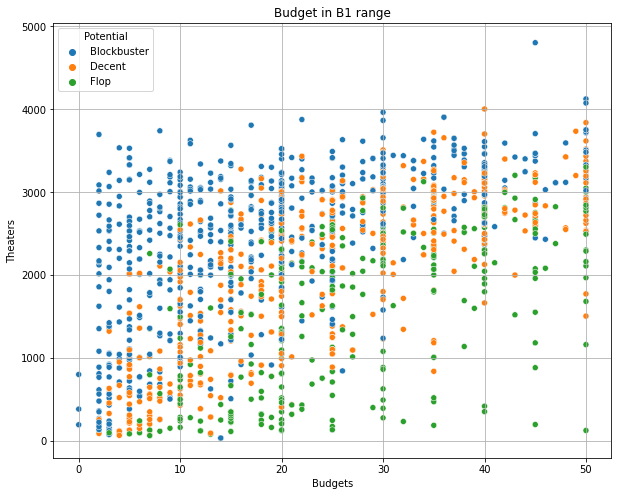

In [7]:
def test(df,col):
    
    #data = df[(df[col]==1)&(2000<=df['Theaters'])&(df['Theaters']<=3000)].copy()
    data = df[(df[col]==1)].copy()
    #data = data[(data['Potential']!='Blockbuster')&(data['Total Gross']<=100)]
    plt.figure(figsize=(10,8))
    sb.scatterplot(x='Budgets',y='Theaters',hue='Potential',data=data)
    plt.title(f"Budget in {col} range")
    plt.grid(True)
    plt.show()
test(df,'B1')

<AxesSubplot:xlabel='Theaters', ylabel='Budgets'>

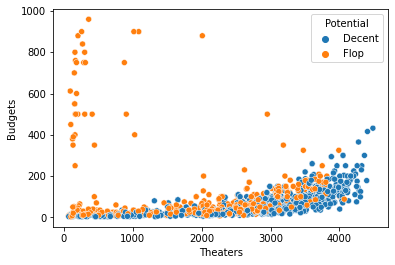

In [8]:
sb.scatterplot(x='Theaters',y='Budgets',hue='Potential',data=df[df['Potential']!='Blockbuster'])

<AxesSubplot:xlabel='Theaters', ylabel='Budgets'>

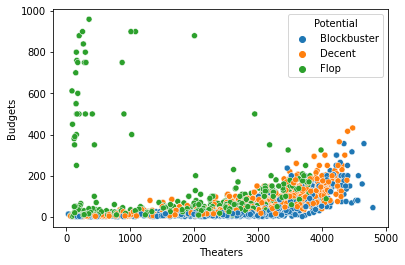

In [9]:
sb.scatterplot(x='Theaters',y='Budgets',hue='Potential',data=df)

In [10]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from scipy import stats

In [11]:
X = df[['Theaters','Budgets']]
y = df['Total Gross']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

In [13]:
model1 = linear_model.LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [14]:
print(model1.coef_)

[0.04617123 0.22388708]


In [15]:
preds1 = model1.predict(X_test)

In [16]:
errors = y_test - preds1

In [17]:
rss = np.sum(errors**2)
rss

3687985.7705669673

In [42]:
ymean = np.mean(y_test)
tss = np.sum((y_test-ymean)**2)
tss

6233245.3157308865

In [43]:
rsquare = (tss-rss)/rss
rsquare

0.6901489603016085

In [18]:
n,p = X_train.shape

In [44]:
f_stat = ((tss-rss)/p)/(rss/(n-p-1))
f_stat

532.1048483925402

In [19]:
rse = np.sqrt(rss/(n-p))
rse

48.88905642723543

In [20]:
se = np.sqrt(np.diagonal(np.linalg.inv(np.dot(X_train.T, X_train)) * rse ** 2))


In [21]:
t_statistics = model1.coef_ / se

# Degrees of freedom
df = n - p

In [22]:
t_statistics

array([84.97588684, 17.00295257])

In [23]:
df

1543

In [24]:
p_values = 2 * (1 - stats.t.cdf(np.abs(t_statistics), df=df))


In [25]:
for i in range(p):
    print(f'Coefficient {i}:')
    print(f'  Standard Error: {se[i]}')
    print(f'  T-Statistic: {t_statistics[i]}')
    print(f'  P-Value: {p_values[i]}')

Coefficient 0:
  Standard Error: 0.0005433450440459135
  T-Statistic: 84.97588683503652
  P-Value: 0.0
Coefficient 1:
  Standard Error: 0.013167541173131545
  T-Statistic: 17.002952565735388
  P-Value: 0.0


In [26]:
df_model = p - 1  # degrees of freedom for the model
df_residual = n - p  # degrees of freedom for the residuals

# Calculate the mean squared errors
mse_model = np.sum((preds1 - np.mean(y_train)) ** 2) / df_model
mse_residual = np.sum((y_test - preds1) ** 2) / df_residual

# Calculate the F-statistic
F_statistic = mse_model / mse_residual

# Calculate the p-value associated with the F-statistic
p_value = 1 - stats.f.cdf(F_statistic, df_model, df_residual)


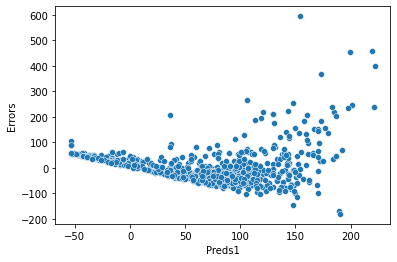

In [27]:
res = pd.DataFrame({'Errors':errors,'Preds1':preds1})
res.head()
sb.scatterplot(y='Errors',x='Preds1',data=res)
plt.show()

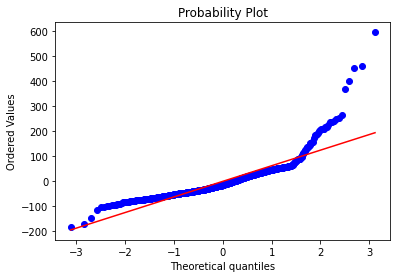

In [28]:
stats.probplot(res['Errors'], dist="norm", plot=plt)
plt.show()

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [30]:
X_train.columns

Index(['Theaters', 'Budgets'], dtype='object')

In [31]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X_train.shape[1])]


In [32]:
print(vif_data)

    feature       VIF
0  Theaters  1.480128
1   Budgets  1.480128


In [33]:
synergy = X['Theaters']*X['Budgets']

In [34]:
mt,mb = [0.04617123, 0.22388708]

c = model1.intercept_

In [35]:
ys = c + mt*X['Theaters'] + mb*X['Budgets']

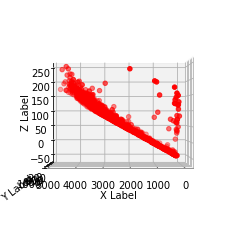

In [50]:
from mpl_toolkits.mplot3d import Axes3D


# Generate random data
x = X['Theaters']
y = X['Budgets']
z = ys

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(elev=0, azim=90)  

plt.show()


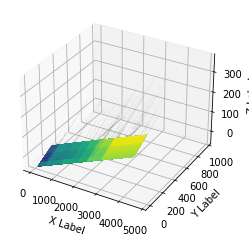

In [38]:
X1, Y1 = np.meshgrid(x, y)
Z = c+(mt*X1)+(mb*Y1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, Y1, Z, cmap='viridis')  # Change the colormap as needed

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()